In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 #### (Correlation & Cross Analysis) ####

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


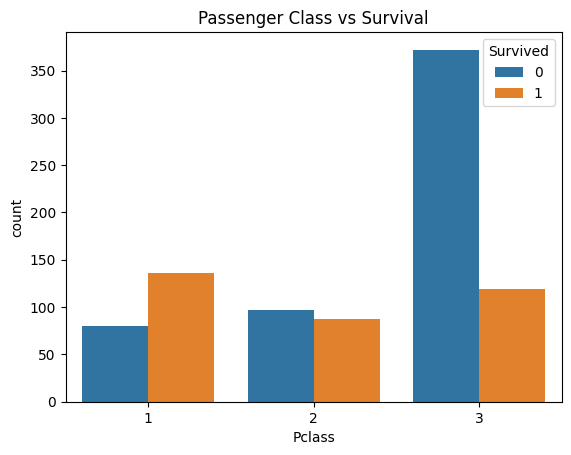

In [ ]:

print(df['Pclass'].value_counts())

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Passenger Class vs Survival")
plt.show()


Sex
male      577
female    314
Name: count, dtype: int64


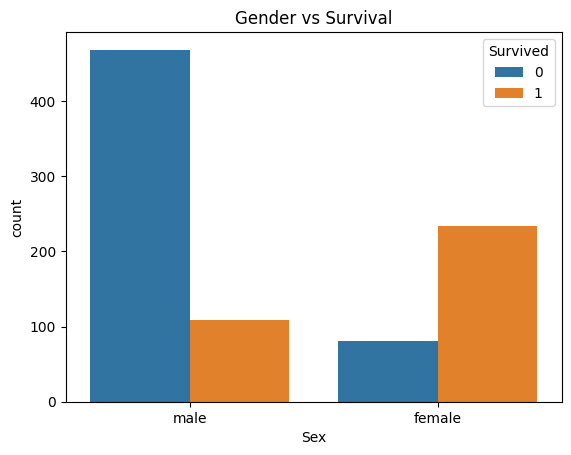

In [3]:
print(df['Sex'].value_counts())
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Gender vs Survival")
plt.show()


# Age Distribution vs Survival

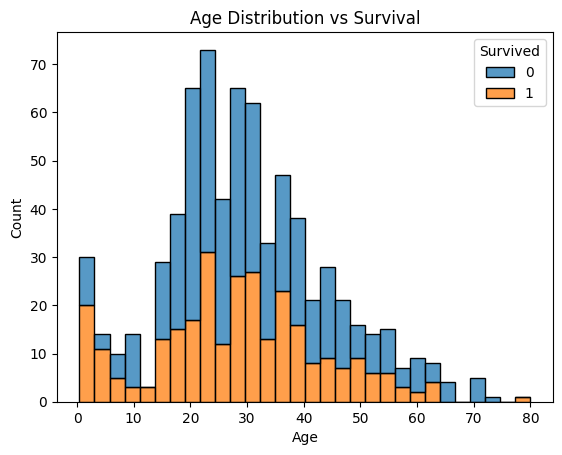

In [4]:
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30)
plt.title("Age Distribution vs Survival")
plt.show()


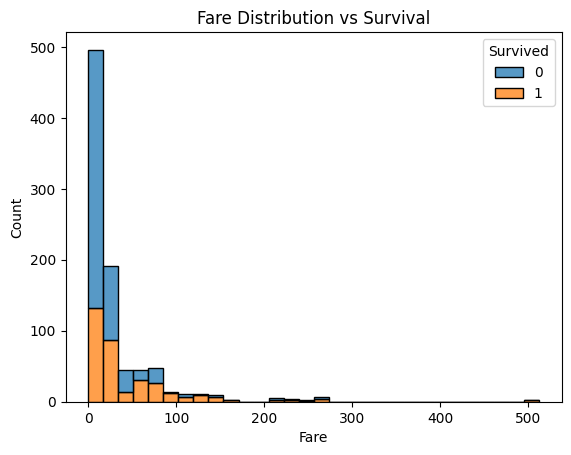

In [5]:
sns.histplot(data=df, x="Fare", hue="Survived", multiple="stack", bins=30)
plt.title("Fare Distribution vs Survival")
plt.show()


In [6]:
df[df['Fare']> 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


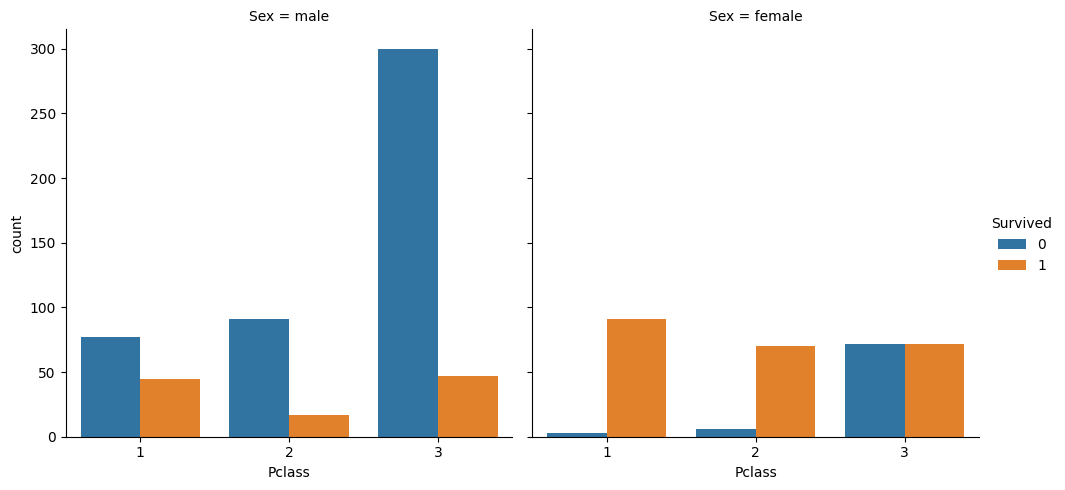

In [7]:
# six and Pclass to gether
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=df)
plt.show()


# Survival Percentage

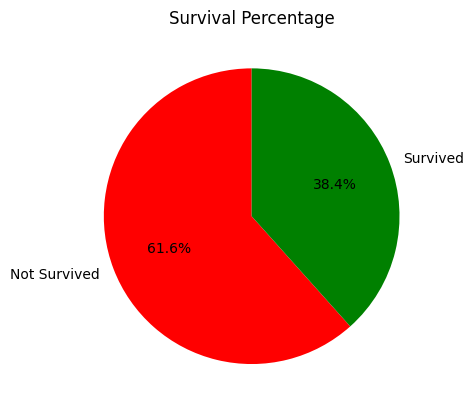

In [8]:
df['Survived'].value_counts().plot.pie(
    labels=['Not Survived', 'Survived'],  
    autopct='%1.1f%%',
    startangle=90,
    colors=['r', 'g']  
)
plt.title("Survival Percentage")
plt.ylabel("")
plt.show()



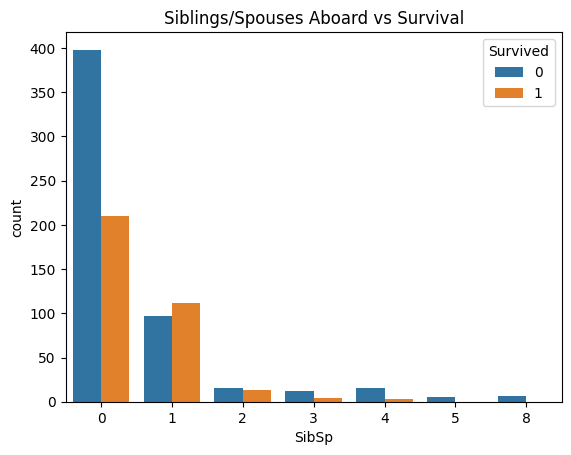

In [9]:
sns.countplot(x="SibSp", hue="Survived", data=df)
plt.title("Siblings/Spouses Aboard vs Survival")
plt.show()


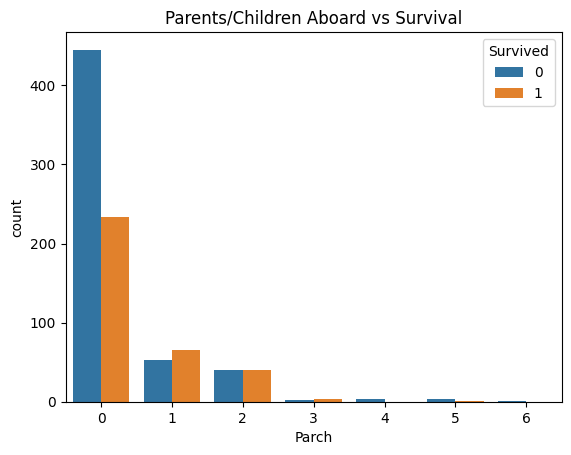

In [10]:
sns.countplot(x="Parch", hue="Survived", data=df)
plt.title("Parents/Children Aboard vs Survival")
plt.show()


## out layer ##

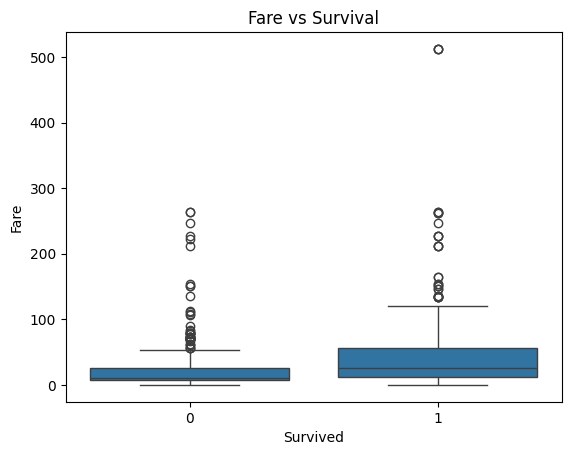

In [11]:

sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.show()


#### family size #####


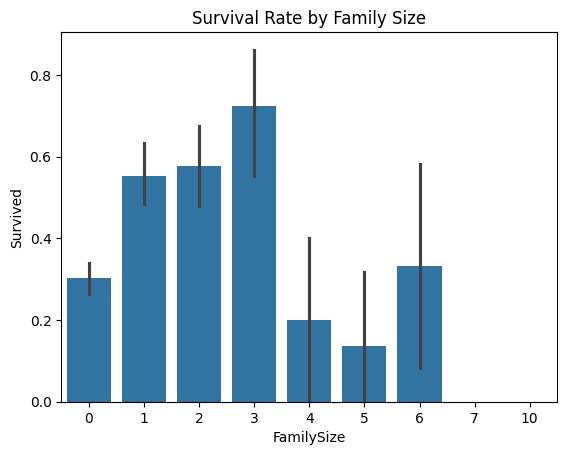

In [14]:

df['FamilySize'] = df['SibSp'] + df['Parch']

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


### Embarked ###


=== Survival rate by Embarked ===
           Died (%)  Survived (%)
Embarked                         
C         44.642857     55.357143
Q         61.038961     38.961039
S         66.304348     33.695652


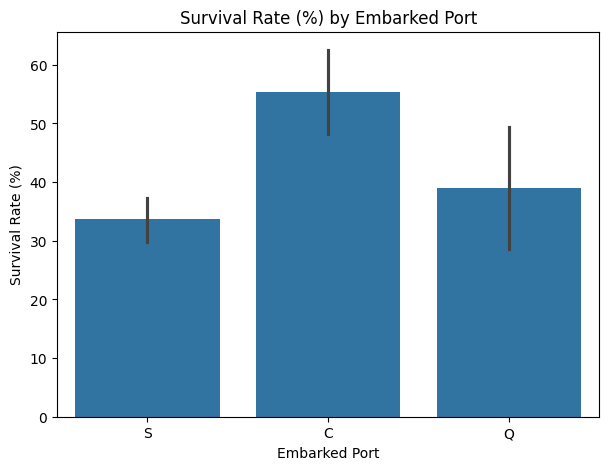

In [15]:
crosstab = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
crosstab.columns = ['Died (%)', 'Survived (%)']
print("=== Survival rate by Embarked ===")
print(crosstab)

 
plt.figure(figsize=(7,5))
sns.barplot(x='Embarked', y='Survived', data=df, estimator=lambda x: 100*sum(x)/len(x))
plt.title("Survival Rate (%) by Embarked Port")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Embarked Port")
plt.show()

# mean_fare_survived & mean_fare_died #

In [3]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_died = df[df['Survived'] == 0]['Fare'].mean()

print("Mean Fare for Survived:", mean_fare_survived)
print("Mean Fare for Not Survived:", mean_fare_died)

Mean Fare for Survived: 48.39540760233918
Mean Fare for Not Survived: 22.117886885245902


#### P-value test ###

In [4]:
from scipy.stats import ttest_ind

fare_survived = df[df['Survived'] == 1]['Fare'].dropna()
fare_notsurvied = df[df['Survived'] == 0]['Fare'].dropna()

t_stat, p_value = ttest_ind(fare_survived, fare_notsurvied)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 7.939191660871055
P-value: 6.120189341924198e-15


# Model Prediction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# pre_processing data and cleaning

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

C:\Users\mS\AppData\Local\Temp\ipykernel_7196\692848512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mS\AppData\Local\Temp\ipykernel_7196\692848512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# spliting data to (Features & Target)

In [10]:
X = df.drop('Survived', axis=1)  
y = df['Survived']

#Train/Test#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model "Logistic Regression"

In [11]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

c:\Users\mS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# test model


In [ ]:

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
new_passenger = pd.DataFrame({
    'PassengerId':[892], 'Pclass':[3], 'Sex':[2], 'Age':[22], 'SibSp':[0], 'Parch':[0],
    'Fare':[7.1], 'Embarked':[2]
})
print("Prediction (Survived=1 , notSurvived=0):", model.predict(new_passenger))


Prediction (Survived=1 , notSurvived=0): [0]


# Gui


In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import ttk

# --------------------
# 1. Prepare the model
# --------------------
df = pd.read_csv("titanic.csv")

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --------------------
# 2. GUI Prediction Function
# --------------------
def predict_survival():
    try:
        # Get values from dropdowns and entries
        pclass = int(combo_pclass.get())
        sex = combo_sex.get().lower()  # male / female
        sibsp = int(combo_sibsp.get())
        parch = int(combo_parch.get())
        embarked = combo_embarked.get().upper()  # S, C, Q
        age = float(entry_age.get())
        fare = float(entry_fare.get())

        # Convert gender to numeric
        sex_num = 1 if sex == 'male' else 0

        # Convert embarked to numeric (same order used during training)
        embarked_map = {'C':0, 'Q':1, 'S':2}
        embarked_num = embarked_map.get(embarked, 2)

        # Prepare new passenger data
        new_passenger = pd.DataFrame({
            'PassengerId':[999],
            'Pclass':[pclass],
            'Sex':[sex_num],
            'Age':[age],
            'SibSp':[sibsp],
            'Parch':[parch],
            'Fare':[fare],
            'Embarked':[embarked_num]
        })

        # Make prediction
        prediction = model.predict(new_passenger)[0]

        if prediction == 1:
            result_label.config(text="Survived ✅", fg="green")
        else:
            result_label.config(text="Not Survived ❌", fg="red")

    except Exception as e:
        result_label.config(text=f"Error: {e}", fg="orange")

# --------------------
# 3. Build Tkinter GUI
# --------------------
root = tk.Tk()
root.title("Titanic Survival Prediction")
root.geometry("400x550")
root.configure(bg="black")

# Dropdown options
pclass_options = ["1", "2", "3"]
sex_options = ["male", "female"]
sibsp_options = [str(i) for i in range(0, 9)]  # 0-8 siblings/spouses
parch_options = [str(i) for i in range(0, 7)]  # 0-6 parents/children
embarked_options = ["S", "C", "Q"]

# Labels + Widgets
tk.Label(root, text="Pclass (1/2/3):", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
combo_pclass = ttk.Combobox(root, values=pclass_options, state="readonly", font=("Arial", 12))
combo_pclass.current(0)
combo_pclass.pack(pady=5)

tk.Label(root, text="Sex (male/female):", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
combo_sex = ttk.Combobox(root, values=sex_options, state="readonly", font=("Arial", 12))
combo_sex.current(0)
combo_sex.pack(pady=5)

tk.Label(root, text="Age:", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
entry_age = tk.Entry(root, font=("Arial", 12))
entry_age.pack(pady=5)

tk.Label(root, text="SibSp (siblings/spouses aboard):", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
combo_sibsp = ttk.Combobox(root, values=sibsp_options, state="readonly", font=("Arial", 12))
combo_sibsp.current(0)
combo_sibsp.pack(pady=5)

tk.Label(root, text="Parch (parents/children aboard):", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
combo_parch = ttk.Combobox(root, values=parch_options, state="readonly", font=("Arial", 12))
combo_parch.current(0)
combo_parch.pack(pady=5)

tk.Label(root, text="Fare:", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
entry_fare = tk.Entry(root, font=("Arial", 12))
entry_fare.pack(pady=5)

tk.Label(root, text="Embarked (S/C/Q):", bg="black", fg="white", font=("Arial", 12)).pack(pady=5)
combo_embarked = ttk.Combobox(root, values=embarked_options, state="readonly", font=("Arial", 12))
combo_embarked.current(0)
combo_embarked.pack(pady=5)

# Predict Button
btn_predict = tk.Button(
    root,
    text="Predict",
    command=predict_survival,
    bg="green",
    fg="white",
    font=("Arial", 14, "bold")
)
btn_predict.pack(pady=20)

# Result Label (empty initially)
result_label = tk.Label(root, text="", bg="black", fg="white", font=("Arial", 16, "bold"))
result_label.pack(pady=20)

root.mainloop()


C:\Users\mS\AppData\Local\Temp\ipykernel_7196\2939078665.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mS\AppData\Local\Temp\ipykernel_7196\2939078665.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example